In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats
import powerlaw
from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
# Load the lora_download_count.pkl file
with open('lora_download_count.pkl', 'rb') as f:
    lora_download_count = pickle.load(f)

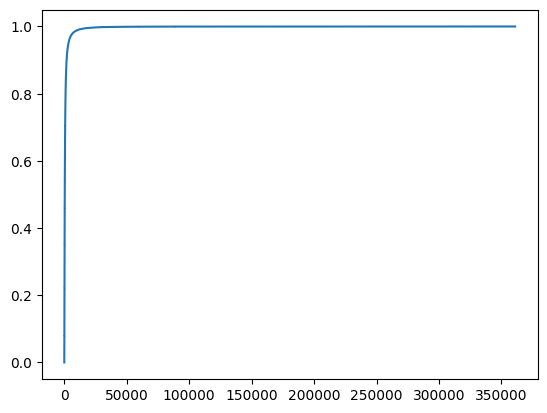

In [5]:
# Convert the list to a pandas Series
data = pd.Series(lora_download_count)

# # Plot the histogram of the data
# plt.hist(data, bins=100, density=True, alpha=0.7, label='Data Histogram')

ecdf = ECDF(data)
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)
plt.step(ecdf.x, ecdf.y, label='Empirical CDF')
plt.show()

Calculating best minimal value for power law fit
2.2297772671765115 1189.0 0.009242266669293784
Loglikelihood ratio (R) comparing power law and lognormal distributions: -56.186672135576174
Statistical significance of R: 9.112979738491262e-10


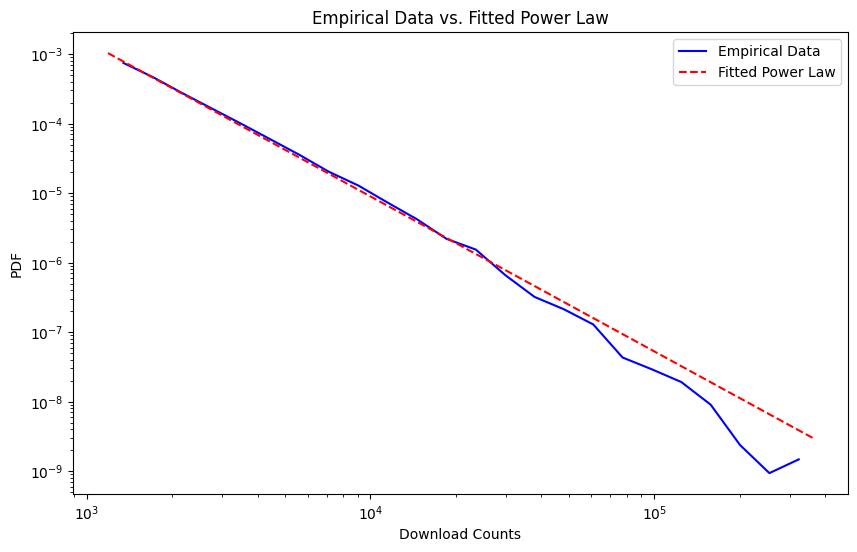

In [7]:
# Fit the data to a power-law distribution
fit = powerlaw.Fit(lora_download_count, discrete=True)
# Note: Consider specifying `xmin` based on empirical analysis or fit diagnostics
print(fit.power_law.alpha, fit.power_law.xmin, fit.power_law.sigma)

# Prepare plot
plt.figure(figsize=(10, 6))

# Plot the empirical data
empirical_data = fit.plot_pdf(color='b', linestyle='-', label='Empirical Data')

# Plot the fitted power-law distribution
power_law = fit.power_law.plot_pdf(color='r', linestyle='--', label='Fitted Power Law')

# Assuming fit is your powerlaw.Fit object
R, p = fit.distribution_compare('power_law', 'lognormal')

print("Loglikelihood ratio (R) comparing power law and lognormal distributions:", R)
print("Statistical significance of R:", p)

plt.xlabel('Download Counts')
plt.ylabel('PDF')
plt.title('Empirical Data vs. Fitted Power Law')
plt.legend()

# Set log-log scale to better visualize power-law behavior
plt.xscale('log')
plt.yscale('log')

plt.show()

In [325]:
# List of distributions to check
distributions = [
    "norm", "expon", "lognorm", "gamma", "beta",
    "weibull_min", "weibull_max", "pareto", "genextreme", "powerlaw"
]

# Store results here
results = []

# Kolmogorov-Smirnov test for each distribution
for distribution in distributions:
    dist = getattr(stats, distribution)
    param = dist.fit(data)
    print(f"Fitting {distribution} distribution with parameters: {param}")
    D, p_value = stats.kstest(data, distribution, args=param)
    results.append((distribution, D, p_value))

# Sort by p-value
results.sort(key=lambda x: x[1])

# Print results
print("Distribution tests results:")
for result in results:
    print(f"{result[0]:15}: D = {result[1]:.7f}")

# The distribution with the highest p-value is considered the best fit.

Fitting norm distribution with parameters: (1040.7662355277819, 3866.615464275024)
Fitting expon distribution with parameters: (3.0, 1037.7662355277819)
Fitting lognorm distribution with parameters: (1.1846748345933968, 1.911000793467772, 424.3634943979548)
Fitting gamma distribution with parameters: (3.6016702704210333e-05, 2.9999999999999996, 4.27077146346602)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Fitting beta distribution with parameters: (0.6719083216276541, 2922.2396588718225, 2.9999999999999964, 4521284.773574628)
Fitting weibull_min distribution with parameters: (0.7192866658485757, 2.9999999999999996, 759.4212927418184)
Fitting weibull_max distribution with parameters: (0.06542859339462817, 361000.0000000001, 1.7587483804804989)
Fitting pareto distribution with parameters: (2.23863008527221, -1138.2096990637174, 1141.2096990637172)
Fitting genextreme distribution with parameters: (-3.88223568586863, 5.925575621888118, 11.364498497218243)
Fitting powerlaw distribution with parameters: (0.1481080274106454, 2.9999999999999996, 360997.00000000006)
Distribution tests results:
lognorm        : D = 0.0331467
pareto         : D = 0.0759338
weibull_min    : D = 0.1146688
beta           : D = 0.1528985
expon          : D = 0.2086939
norm           : D = 0.3942792
powerlaw       : D = 0.4512698
genextreme     : D = 0.5939004
weibull_max    : D = 0.8889228
gamma          : D = 0.99994

Parameters: (1.1846748345933968, 1.911000793467772, 424.3634943979548)
Kolmogorov-Smirnov statistic: 0.033146696549469445


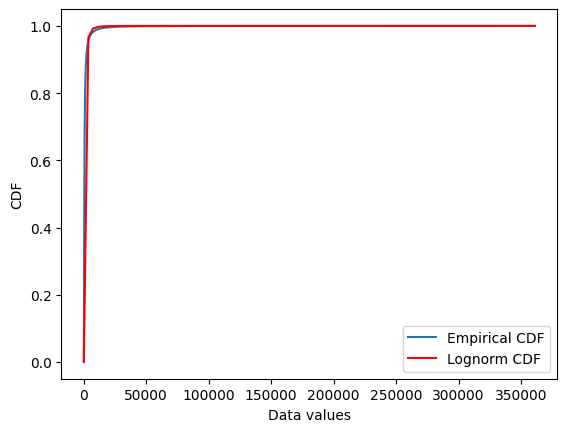

In [338]:
# Lognormal distribution
# Calculate the ECDF of the original data
ecdf = ECDF(data)

distribution = stats.lognorm  # replace with your chosen distribution
params = distribution.fit(data)
print(f"Parameters: {params}")

# Generate a range of values over which to evaluate the CDF
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)

# Calculate the CDF of the fitted distribution
cdf_fitted = distribution.cdf(x, *params)

# Calculate the loss
D, _ = stats.kstest(data, 'lognorm', args=params)
print(f"Kolmogorov-Smirnov statistic: {D}")

# Plot the ECDF
plt.step(ecdf.x, ecdf.y, label='Empirical CDF')

# Plot the CDF of the fitted distribution
plt.plot(x, cdf_fitted, 'r-', label='Lognorm CDF')

plt.xlabel('Data values')
plt.ylabel('CDF')
plt.legend()
plt.show()

Parameters: (2.23863008527221, -1138.2096990637174, 1141.2096990637172)
Kolmogorov-Smirnov test: D = 0.0759338


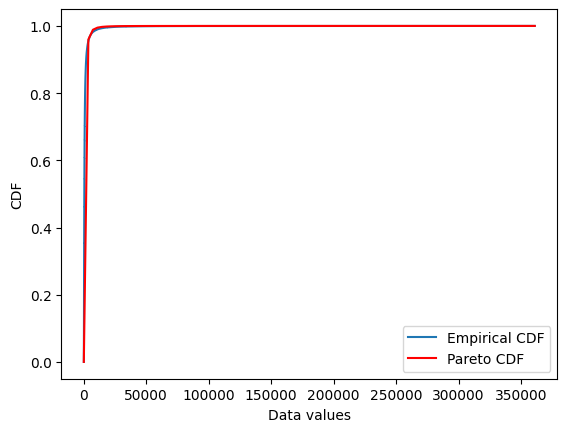

In [336]:
# Pareto distribution
distribution = stats.pareto
params = distribution.fit(data)
print(f"Parameters: {params}")

# Generate a range of values over which to evaluate the CDF
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)

# Calculate the CDF of the fitted distribution
cdf_fitted = distribution.cdf(x, *params)

# Calculate the loss
D, _ = stats.kstest(data, 'pareto', args=params)
print(f"Kolmogorov-Smirnov test: D = {D:.7f}")

# Plot the ECDF
plt.step(ecdf.x, ecdf.y, label='Empirical CDF')

# Plot the CDF of the fitted distribution
plt.plot(x, cdf_fitted, 'r-', label='Pareto CDF')

plt.xlabel('Data values')
plt.ylabel('CDF')
plt.legend()
plt.show()


Parameters: (0.7192866658485757, 2.9999999999999996, 759.4212927418184)
Kolmogorov-Smirnov test: D = 0.1146688


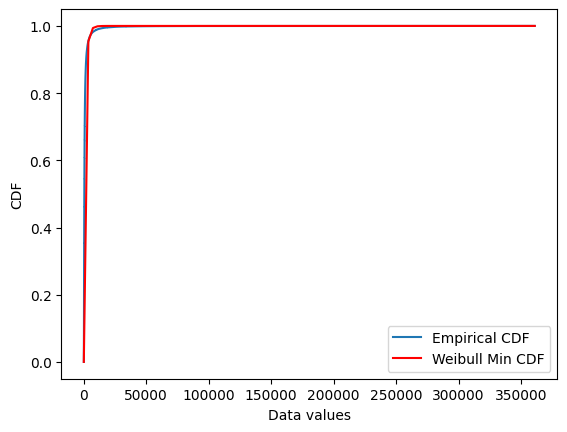

In [339]:
# Weibull minimum distribution
distribution = stats.weibull_min
params = distribution.fit(data)
print(f"Parameters: {params}")

# Generate a range of values over which to evaluate the CDF
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)

# Calculate the CDF of the fitted distribution
cdf_fitted = distribution.cdf(x, *params)

# Calculate the loss
D, _ = stats.kstest(data, 'weibull_min', args=params)
print(f"Kolmogorov-Smirnov test: D = {D:.7f}")

# Plot the ECDF
plt.step(ecdf.x, ecdf.y, label='Empirical CDF')

# Plot the CDF of the fitted distribution
plt.plot(x, cdf_fitted, 'r-', label='Weibull Min CDF')

plt.xlabel('Data values')
plt.ylabel('CDF')
plt.legend()
plt.show()

Parameters: (0.1481080274106454, 2.9999999999999996, 360997.00000000006)
Kolmogorov-Smirnov test: D = 0.4512698


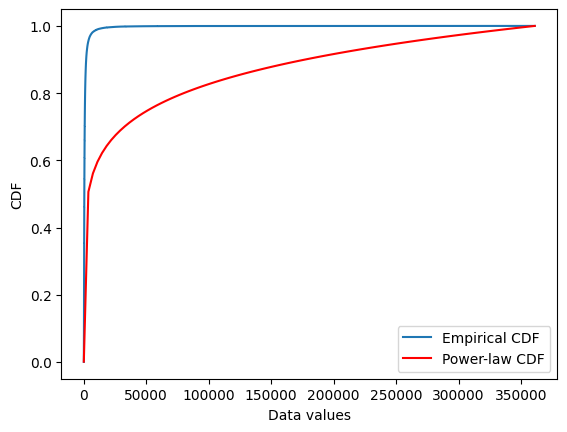

In [340]:
# Power-law distribution
distribution = stats.powerlaw
params = distribution.fit(data)
print(f"Parameters: {params}")

# Generate a range of values over which to evaluate the CDF
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)

# Calculate the CDF of the fitted distribution
cdf_fitted = distribution.cdf(x, *params)

# Calculate the loss
D, _ = stats.kstest(data, 'powerlaw', args=params)
print(f"Kolmogorov-Smirnov test: D = {D:.7f}")

# Plot the ECDF
plt.step(ecdf.x, ecdf.y, label='Empirical CDF')

# Plot the CDF of the fitted distribution
plt.plot(x, cdf_fitted, 'r-', label='Power-law CDF')

plt.xlabel('Data values')
plt.ylabel('CDF')
plt.legend()
plt.show()


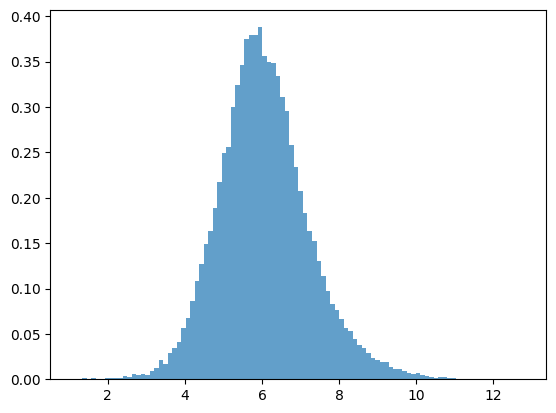

In [342]:
# Plot the histogram of log(data)
plt.hist(np.log(data), bins=100, density=True, alpha=0.7, label='Data Histogram')
plt.show()